<a href="https://colab.research.google.com/github/ozbekmurat/Colab/blob/main/F1tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [6]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
base_dir=r"/content/drive/MyDrive/Colab Notebooks/f1"

In [9]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="training",batch_size=2)

test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="validation",batch_size=2)


Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


In [10]:
import matplotlib.pyplot as plt

for _ in range(5):
    img, label = test_datagen.next()
    print(img.shape)   
    #plt.imshow(img[0])
    print(label[0])   

    #plt.show()
    

(2, 500, 500, 3)
[0. 1. 0. 0.]
(2, 500, 500, 3)
[1. 0. 0. 0.]
(2, 500, 500, 3)
[0. 0. 0. 1.]
(2, 500, 500, 3)
[1. 0. 0. 0.]
(2, 500, 500, 3)
[0. 0. 1. 0.]


In [11]:
import tensorflow as tf
import numpy as np
import pylab as pl
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers,activations

In [12]:
from keras.models import Sequential

In [13]:
model=Sequential()

model.add(layers.Conv2D(filters=4,activation="elu",kernel_size=(5,5),input_shape=(500,500,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=8,activation="elu",kernel_size=(3,3),name="layer"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=16,activation="elu",kernel_size=(3,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=32,activation="elu",kernel_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(4,activation="softmax"))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 496, 496, 4)       304       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 248, 248, 4)      0         
 )                                                               
                                                                 
 layer (Conv2D)              (None, 246, 246, 8)       296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 8)      0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 121, 121, 16)      1168      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 16)       0

In [15]:
optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001)
loss=tf.keras.losses.CategoricalCrossentropy()

In [16]:
model.compile(optimizer=optimizer,loss=loss,metrics=["mse","accuracy"])

In [17]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir=r"/content/drive/MyDrive/Colab Notebooks/f1"

train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="training",batch_size=2)

test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="validation",batch_size=2)

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


In [18]:
result=model.fit(train_datagen,epochs=5,verbose=1,validation_data=test_datagen)

Epoch 1/5
126/126 [==============================] - 92s 705ms/step - loss: 1.7063 - mse: 0.1915 - accuracy: 0.3373 - val_loss: 1.6572 - val_mse: 0.2104 - val_accuracy: 0.2500
Epoch 2/5
126/126 [==============================] - 78s 619ms/step - loss: 0.9287 - mse: 0.1302 - accuracy: 0.5873 - val_loss: 1.7594 - val_mse: 0.1935 - val_accuracy: 0.4286
Epoch 3/5
126/126 [==============================] - 73s 581ms/step - loss: 0.4757 - mse: 0.0629 - accuracy: 0.8294 - val_loss: 1.7341 - val_mse: 0.2144 - val_accuracy: 0.4643
Epoch 4/5
126/126 [==============================] - 75s 594ms/step - loss: 0.1410 - mse: 0.0155 - accuracy: 0.9643 - val_loss: 1.7299 - val_mse: 0.2115 - val_accuracy: 0.4643
Epoch 5/5
126/126 [==============================] - 73s 579ms/step - loss: 0.0360 - mse: 0.0020 - accuracy: 0.9960 - val_loss: 2.1442 - val_mse: 0.2317 - val_accuracy: 0.4643


In [19]:
len(tf.config.list_physical_devices('GPU'))

0

In [20]:
import tensorflow as tf
tf.test.is_gpu_available()
tf.test.is_built_with_cuda()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [21]:
import tensorflow as tf
print("Num TPUs Available: ", len(tf.config.experimental.list_physical_devices('TPU')))

Num TPUs Available:  0


In [22]:
result.history

{'loss': [1.7063449621200562,
  0.9286653399467468,
  0.4756799638271332,
  0.1409967690706253,
  0.03597983345389366],
 'mse': [0.19154958426952362,
  0.130232036113739,
  0.06291253119707108,
  0.015477705746889114,
  0.002027684822678566],
 'accuracy': [0.3373015820980072,
  0.5873016119003296,
  0.829365074634552,
  0.9642857313156128,
  0.9960317611694336],
 'val_loss': [1.6572229862213135,
  1.7593919038772583,
  1.7341006994247437,
  1.7298622131347656,
  2.144230604171753],
 'val_mse': [0.21042585372924805,
  0.19349850714206696,
  0.21439900994300842,
  0.2114834040403366,
  0.23173494637012482],
 'val_accuracy': [0.25,
  0.4285714328289032,
  0.4642857015132904,
  0.4642857015132904,
  0.4642857015132904]}

In [23]:
model.evaluate(test_datagen)

14/14 [==============================] - 2s 169ms/step - loss: 2.1442 - mse: 0.2317 - accuracy: 0.4643


[2.144230604171753, 0.23173494637012482, 0.4642857015132904]

{'Ferrari': 0, 'McLaren': 1, 'Mercedes': 2, 'Redbull': 3}
1/1 [==============================] - 0s 363ms/step
mercedes


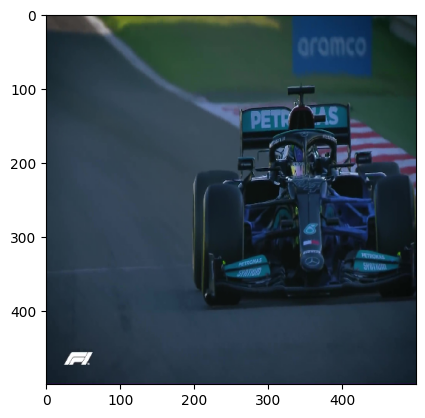

1/1 [==============================] - 0s 159ms/step
redbull


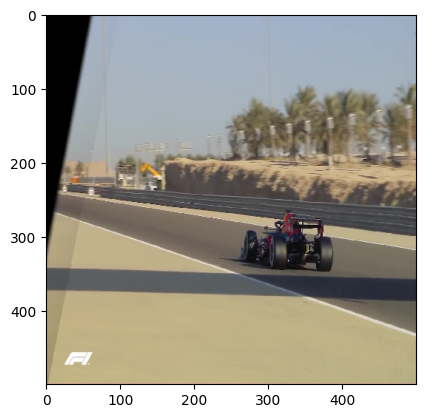

1/1 [==============================] - 0s 156ms/step
mercedes


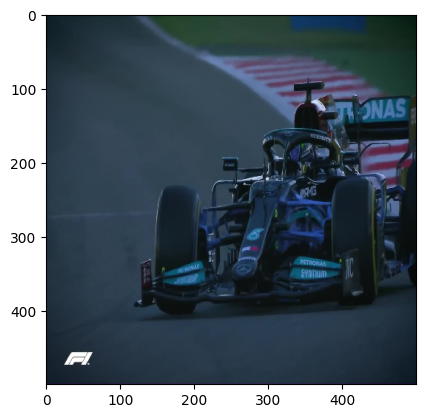

1/1 [==============================] - 0s 155ms/step
redbull


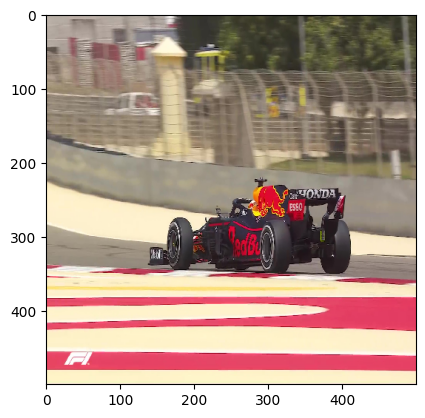

1/1 [==============================] - 0s 151ms/step
mercedes


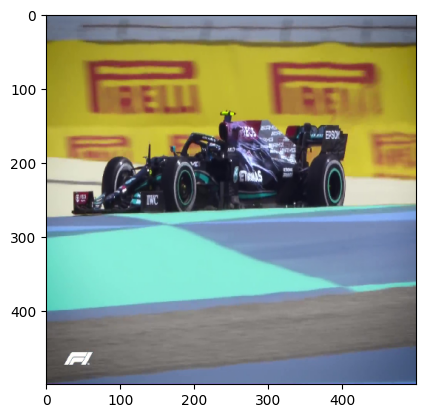

1/1 [==============================] - 0s 203ms/step
redbull


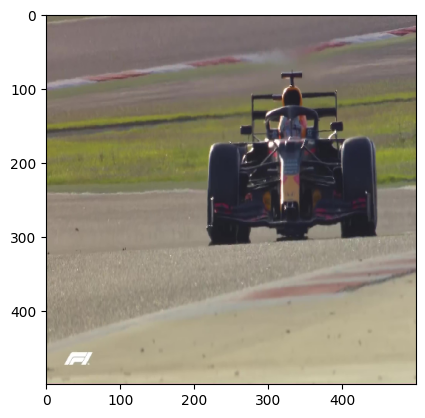

1/1 [==============================] - 0s 214ms/step
redbull


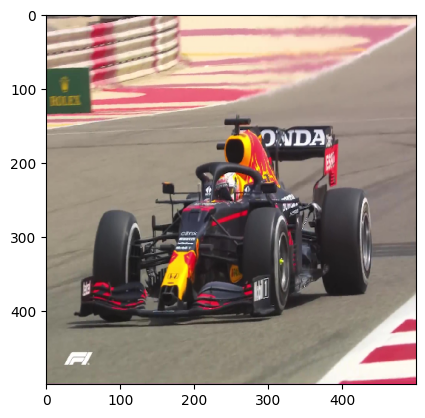

1/1 [==============================] - 0s 220ms/step
redbull


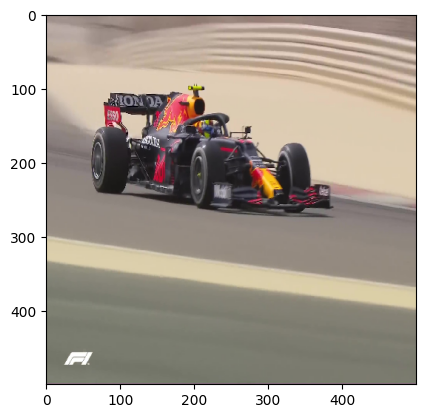

1/1 [==============================] - 0s 224ms/step
ferrari


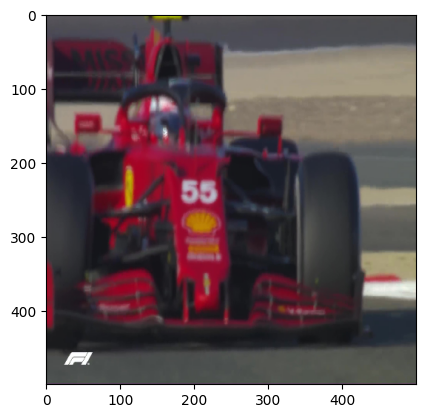

1/1 [==============================] - 0s 182ms/step
redbull


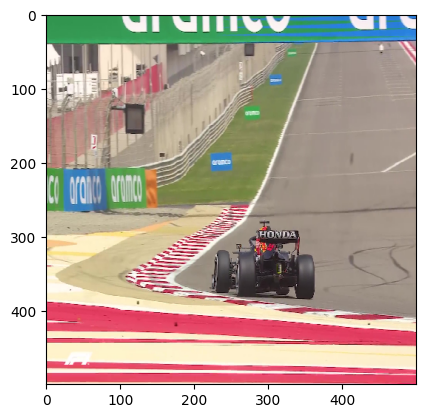

In [24]:
print(test_datagen.class_indices)
for _ in range(10):
    img,label =train_datagen.next()
    a=model.predict(img)
    np.argmax(a[0]) 
    plt.imshow(img[0])
    if np.argmax(a[0])==0:
        print("ferrari")
    if np.argmax(a[0])==1:
        print("mclaren")
    if np.argmax(a[0])==2:
        print("mercedes")
    if np.argmax(a[0])==3:
        print("redbull")
        
    plt.show()   

In [26]:
from PIL import Image
from skimage import transform

In [28]:
image=Image.open(r"/content/drive/MyDrive/Colab Notebooks/f1/ferrari1.jpeg")

def tek_resim(path):
    image=Image.open(path)
    image=np.array(image).astype("float32")/255
    image=transform.resize(image,(500,500,3))
    image=np.expand_dims(image,axis=0)
    print(test_datagen.class_indices)
    return image

image=tek_resim(r"/content/drive/MyDrive/Colab Notebooks/f1/ferrari1.jpeg")
pred=model.predict(image)
print(pred)
np.argmax(pred)

{'Ferrari': 0, 'McLaren': 1, 'Mercedes': 2, 'Redbull': 3}
1/1 [==============================] - 0s 87ms/step
[[1.4215362e-01 8.5777736e-01 3.0212697e-05 3.8832070e-05]]


1